In [1]:
import cv2
import os
import numpy as np
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torchvision import models
from PIL import Image
import torchvision.transforms as transforms

In [5]:
%pip install labelme2coco
%pip install labelme


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Install Detectron2 via pip
%pip install detectron2


Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install labelme2coco


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import json
import numpy as np
import cv2

def labelme_to_coco(labelme_folder, output_json):
    images = []
    annotations = []
    categories = []
    category_map = {}
    annotation_id = 1
    image_id = 1

    for json_file in os.listdir(labelme_folder):
        if json_file.endswith('.json'):
            json_path = os.path.join(labelme_folder, json_file)
            with open(json_path, 'r') as f:
                data = json.load(f)

            image_info = {
                'id': image_id,
                'file_name': data['imagePath'],
                'height': data['imageHeight'],
                'width': data['imageWidth'],
            }
            images.append(image_info)

            for shape in data['shapes']:
                label = shape['label']
                if label not in category_map:
                    category_map[label] = len(categories) + 1
                    categories.append({
                        'id': category_map[label],
                        'name': label,
                        'supercategory': 'none'
                    })

                points = np.array(shape['points'])
                segmentation = points.flatten().tolist()
                area = cv2.contourArea(points.astype(np.int32))
                x, y, w, h = cv2.boundingRect(points.astype(np.int32))

                annotation = {
                    'id': annotation_id,
                    'image_id': image_id,
                    'category_id': category_map[label],
                    'segmentation': [segmentation],
                    'area': area,
                    'bbox': [x, y, w, h],
                    'iscrowd': 0
                }
                annotations.append(annotation)
                annotation_id += 1

            image_id += 1

    coco_format = {
        'images': images,
        'annotations': annotations,
        'categories': categories
    }

    # Ensure folder exists before saving
    os.makedirs(os.path.dirname(output_json), exist_ok=True)

    with open(output_json, 'w') as f:
        json.dump(coco_format, f)

    print(f"COCO JSON saved to {output_json}")


In [10]:
from detectron2.data.datasets import register_coco_instances

#Registering our dataset:
register_coco_instances(
    name="my_fashion_dataset",
    metadata={},
    json_file="/Users/user/Desktop/train/annotations/instances_train.json",
    image_root="/Users/user/Desktop/train/images"
)


In [11]:
from detectron2.data import MetadataCatalog, DatasetCatalog

# List all registered datasets
print(DatasetCatalog.list())

['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco_2017_val_panoptic_stuffonly', 'coco_2017_val_panoptic', 'coco_2017_val_100_panoptic_separated', 'coco_2017_val_100_panoptic_stuffonly', 'coco_2017_val_100_panoptic', 'lvis_v1_train', 'lvis_v1_val', 'lvis_v1_test_dev', 'lvis_v1_test_challenge', 'lvis_v0.5_train', 'lvis_v0.5_val', 'lvis_v0.5_val_rand_100', 'lvis_v0.5_test', 'lvis_v0.5_train_cocofied', 'lvis_v0.5_val_cocofied', 'cityscapes_fine_instance_seg_train', 'cityscapes_fine_sem_seg_train', 'citysca

In [12]:
# Access the metadata
fashion_metadata = MetadataCatalog.get("my_fashion_dataset")
print(fashion_metadata)

Metadata(name='my_fashion_dataset', json_file='/Users/user/Desktop/train/annotations/instances_train.json', image_root='/Users/user/Desktop/train/images', evaluator_type='coco')


In [13]:
# Load the dataset dicts
dataset_dicts = DatasetCatalog.get("my_fashion_dataset")
print(f"Number of images: {len(dataset_dicts)}")


Number of images: 19


In [11]:
%pip install opencv-python
%pip install pygments

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
os.environ["MPLBACKEND"] = "Agg"  # This overrides the old backend before matplotlib is even imported

import matplotlib
import matplotlib.pyplot as plt


In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [16]:
%matplotlib inline

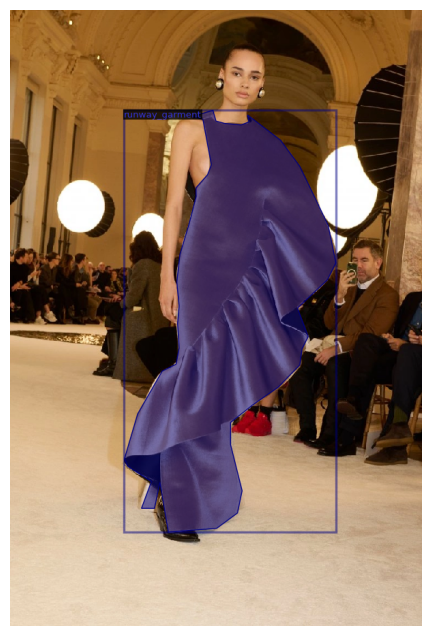

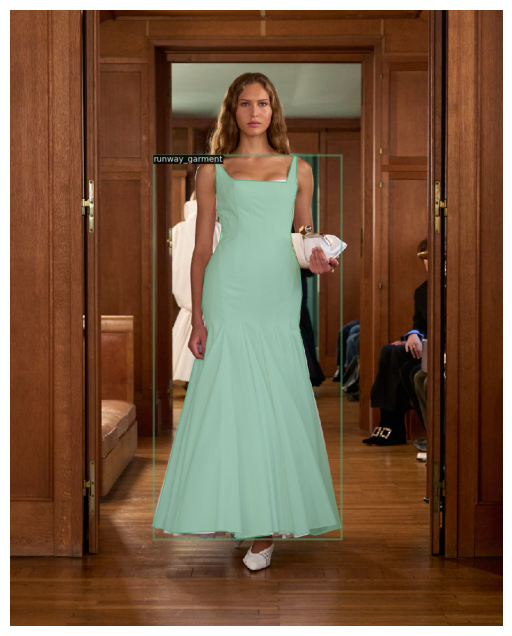

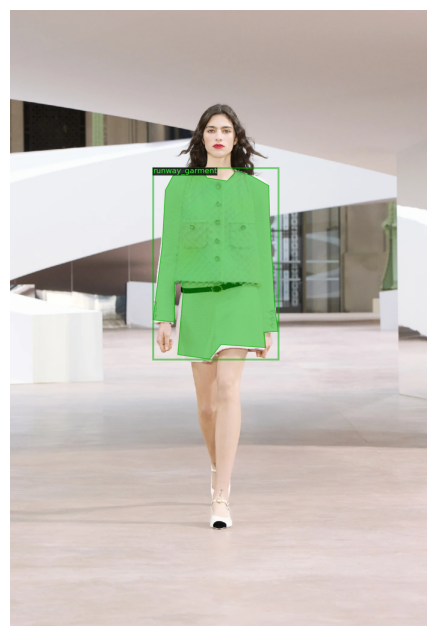

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Replace with actual dataset name if different
dataset_name = "my_fashion_dataset"

# Get the metadata and dataset dicts
metadata = MetadataCatalog.get(dataset_name)
dataset_dicts = DatasetCatalog.get(dataset_name)

# Display 3 random samples
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8)
    out = v.draw_dataset_dict(d)
    
    # Create a figure for the plot
    plt.figure(figsize=(12, 8))
    plt.imshow(out.get_image())
    plt.axis("off")

    # plt.show() will display the plot inline
    try:
        plt.show()
    except:
        # If plt.show() fails (non-interactive environments), we can save the plot instead
        plt.savefig(f"output_image_{d['image_id']}.png")

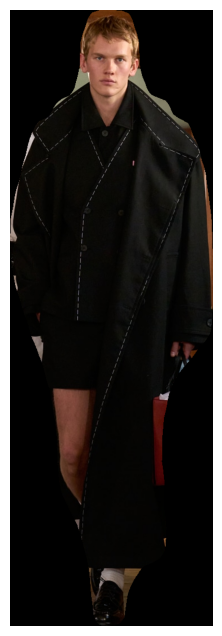

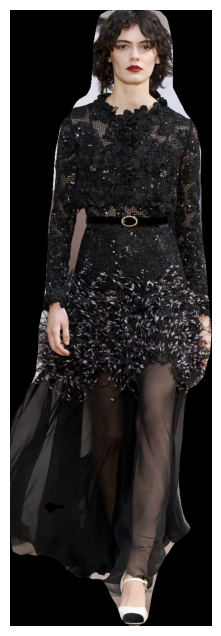

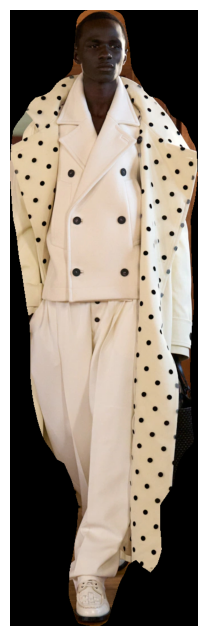

In [ ]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Load config and weights from Detectron2 model zoo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Threshold for the detections
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available

predictor = DefaultPredictor(cfg)

image_folder = "/Users/user/Desktop/Project Submission/Implementation/Source Code/Source Code/project 2/public/images/AllRunwayImages"
output_folder = "/Users/user/Desktop/Project Submission/Implementation/Source Code/Source Code/project 2/public/images/ProcessedRunwayImages"
os.makedirs(output_folder, exist_ok=True)

# Counter to limit the number of visualizations
visualization_counter = 0
max_visualizations = 3  # Show only 3 visualizations

# Function to extract and save the largest garment (without padding) in PNG format
def extract_and_save_largest_garment(img, masks, output_path):
    # Find the largest mask based on area
    areas = [np.sum(mask) for mask in masks]  # Calculate area of each mask (number of True pixels)
    largest_mask_idx = np.argmax(areas)  # Index of the largest mask

    # Create a cleaned image using only the largest mask
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cleaned_img = np.zeros_like(img_rgb)

    # Apply the largest mask to extract the garment
    cleaned_img[masks[largest_mask_idx]] = img_rgb[masks[largest_mask_idx]]

    # Crop the extracted garment to remove any unnecessary padding (white background)
    # Find the bounding box of the mask
    x, y, w, h = cv2.boundingRect(masks[largest_mask_idx].astype(np.uint8))

    # Crop the image based on the bounding box
    cropped_img = cleaned_img[y:y+h, x:x+w]

    # Save the cropped image in PNG format
    cv2.imwrite(output_path, cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))

# Iterate over each image in the dataset and process the largest garment
for image_file in os.listdir(image_folder):
    if not image_file.lower().endswith('.png'):
        continue
    
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)

    # Step 1: Perform inference to get instance masks and labels
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")
    masks = instances.pred_masks.numpy()  # Get all masks in the image

    # Step 2: Save the largest garment if there are any masks
    if len(masks) > 0:
        # Define the output path to save the largest garment image
        output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_largest_garment.png")
        
        # Save the largest garment
        extract_and_save_largest_garment(img, masks, output_path)

        # Optional: Display a few visualizations (3 max)
        if visualization_counter < max_visualizations:
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(cv2.imread(output_path), cv2.COLOR_BGR2RGB))
            plt.axis("off")
            plt.show()
            visualization_counter += 1
    else:
        print(f"No detections in {image_file}.")
